In [1]:
#FIX DATA GAPS
#CHOOSE TEST DATA WITHIN TRAIN DATA
#RERUN
# SUGGESTIONs FOR DATA: 1.LARGER BINS IN TIME (5 MINS 30 MINS 1 HOURS)
# 2. MEDIAN INSTEAD OF MEAN
# 3. LABELS: NOT ALL FRAMES ACTUALLY HAVE A FACE REGOGNIZED!!! CHECK THE 'SUCCESS' COLUMN (ALREADY THROWN OUT HERE)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from FeatureRelated.feature_generator import Feature_generator
from LabelRelated.label_generator import Label_generator 
import warnings
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import time

In [42]:
#edf_path, emo_path=get_paths(pat_name,sess)
featuregen=Feature_generator('/data2/users/stepeter/Preprocessing/processed_cb46fd46_4.h5', wsize=700)

In [43]:
#TODO don't show pass the mask here, do it somewhere else (Symbiosis class)
#TODO these numbers currently come from handpicking an interval of time that has continuous recordings
#They are considered in featuregen and have to be considered in the labels as well. DO THIS DIFFERENTLY THOUGH
lablegen=Label_generator('/home/emil/data/hdf_data/cb46fd46_8_realtime.csv', wsize=700,start=featuregen.start,stop=featuregen.end)
#lablegen=Label_generator('/home/emil/data/hdf_data/cb46fd46_8_realtime.csv', wsize=1800,start=11,stop=43205)


In [ ]:
featuregen.wsize=
lablegengen.wsize=
s_sample=
e_sample=

  0%|          | 0/100 [00:00<?, ?it/s]

Setting up PCA on current data range...


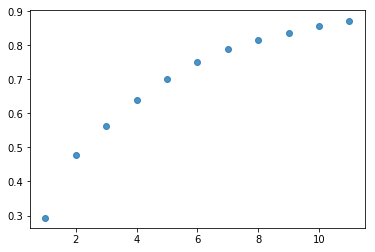

In [44]:
#do simple tr/test linear regression
sliding=False
x=featuregen.generate_features(start=0,end=40000,expl_variance=87,train=True,sliding_window=sliding)

In [45]:
y=lablegen.generate_labels(start=0,end=40000,mask=featuregen.mask_bin, sliding_window=sliding)

In [ ]:
# ##all for debugging purposes
# # df=pd.read_csv('/home/emil/data/hdf_data/cb46fd46_8_realtime.csv',error_bad_lines=False, low_memory=False,parse_dates=['realtime'])

# # df['realtime'][:]

# # som_ob=df['realtime'][1:]-df['realtime'][:-1]
# # som_ob[0]

# # tot=0
# # # for i in range(1,(df.shape[0])):
# # #     if (df.loc[i][-1]-df.loc[i-1][-1]).seconds >0:
# # #         tot=(df.loc[i][-1]-df.loc[i-1][-1]).seconds
# # #         sec= tot/1000
# # #         print('seconds passed since last frame: %d, which was on frame %d' % (tot, i), 'which is at', df.loc[i][-1])
# # tot=0
# # for i in range(1,3481):
# #     if df.loc[i][0]-df.loc[i-1][0] >1:
# #         print('hoppla')
# # tot

# # df['Happy_predicted'].value_counts()

# import h5py
# scrrr=h5py.File('/data2/users/stepeter/Preprocessing/processed_cb46fd46_4.h5')

# scrrr['dataset'].shape[1]/500

In [46]:
print(x.shape)
print(y.shape)

(57, 11)
(57,)


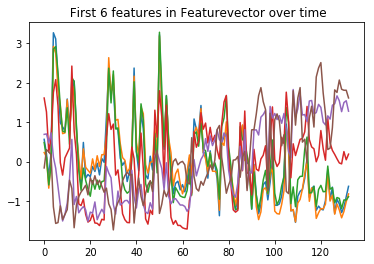

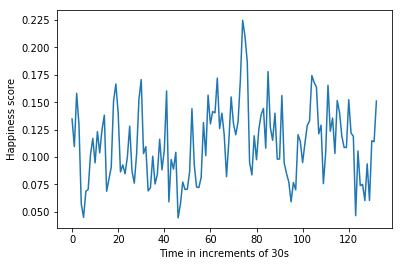

In [16]:
ran=6
for i in range(ran):
    plt.plot(featuregen.curr_data[:,i])
plt.title(' First %d features in Featurevector over time' % ran)
plt.show()
plt.plot(y)
plt.xlabel('Time in increments of 30s')
plt.ylabel('Happiness score')
plt.show()

In [ ]:
# TODO Median 
#Try median 

In [47]:
x_ev=featuregen.generate_features(start=16000,end=20000,train=False,sliding_window=sliding)

y_ev=lablegen.generate_labels(start=16000,end=20000,sliding_window=sliding, mask=featuregen.mask_bin)

In [ ]:
# print(y.shape)
# print(y_ev.shape)
# print(x.shape)
# print(x_ev.shape)
# #print(y.shape)
# lel=(featuregen.mask_bin[:30000].reshape(featuregen.wsize,-1))
# print(lel.shape)
# lel=np.any(lel,axis=0)
# np.unique(lel,return_counts=True)

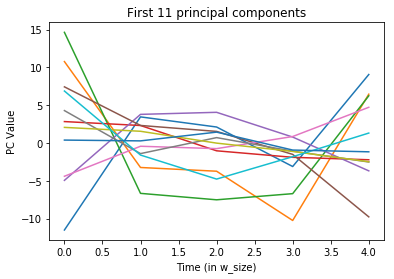

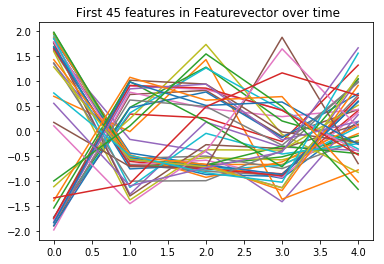

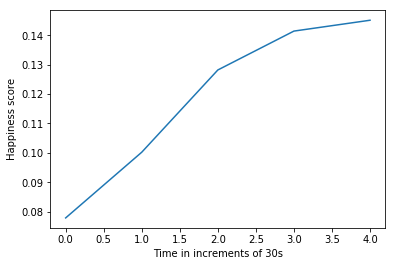

In [48]:
#plot different things

featuregen.vis_pc()

#featuregen.vis_raw_data(start=16000,stop=20000)

featuregen.curr_data.shape

#Plotting the actual features over time. Here, plot the first five features.
ran=45
for i in range(ran):
    plt.plot(featuregen.curr_data[:,i])
plt.title(' First %d features in Featurevector over time' % ran)
plt.show()
plt.plot(y_ev)
plt.xlabel('Time in increments of 30s')
plt.ylabel('Happiness score')
plt.show()

In [49]:
from sklearn.linear_model import RidgeCV
from sklearn import linear_model

In [50]:
ols=linear_model.LinearRegression()
ridge=RidgeCV(alphas=np.array([1000000000,100,10000,1000,10,1,.1,]),store_cv_values=True)
#ridge=linear_model.Ridge(alpha=10000)
ols.fit(x,y)
ridge.fit(x,y)

RidgeCV(alphas=array([  1.00000e+09,   1.00000e+02,   1.00000e+04,   1.00000e+03,
         1.00000e+01,   1.00000e+00,   1.00000e-01]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

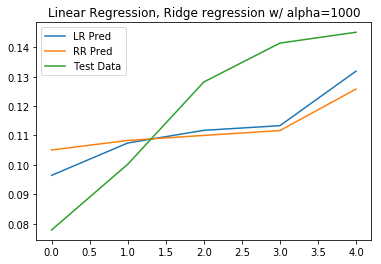

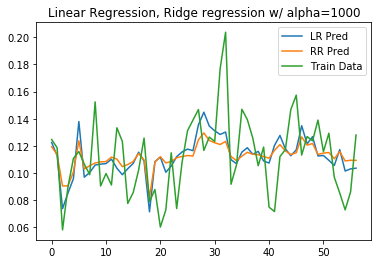

In [51]:
y_pred_l=ols.predict(x_ev)
y_pred_ridge=ridge.predict(x_ev)

plt.plot(y_pred_l,label='LR Pred')
plt.plot(y_pred_ridge,label='RR Pred')
plt.title('Linear Regression, Ridge regression w/ alpha=%d' % ridge.alpha_)
plt.plot(y_ev,label='Test Data')
plt.legend()
plt.show()

y_tr_pred_l=ols.predict(x)
y_tr_pred_ridge=ridge.predict(x)

plt.plot(y_tr_pred_l[:150],label='LR Pred')
plt.plot(y_tr_pred_ridge[:150],label= 'RR Pred')
plt.title('Linear Regression, Ridge regression w/ alpha=%d' % ridge.alpha_)
plt.plot(y[:150], label='Train Data')
plt.legend()
plt.show()

(57, 7)


Text(0.5,0,'Iteration')

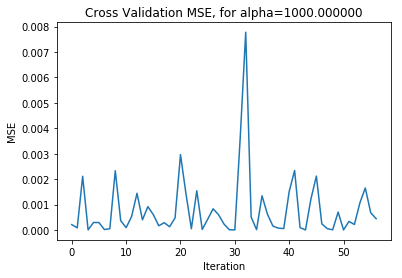

In [52]:
print(ridge.cv_values_.shape)
plt.plot(ridge.cv_values_[:,3])
plt.title('Cross Validation MSE, for alpha=%3f'% ridge.alphas[3])
plt.ylabel('MSE')
plt.xlabel('Iteration')

In [53]:
#try Kernel Ridge
kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e2,1e4,1e0, 0.1, 1e-2],
                              "gamma": np.logspace(-4, 4, 25)},scoring='neg_mean_squared_error',n_jobs=-1)


kr.fit(x,y)


/home/emil/miniconda3/envs/openmind/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=0.1, kernel='rbf',
      kernel_params=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [100.0, 10000.0, 1.0, 0.1, 0.01], 'gamma': array([  1.00000e-04,   2.15443e-04,   4.64159e-04,   1.00000e-03,
         2.15443e-03,   4.64159e-03,   1.00000e-02,   2.15443e-02,
         4.64159e-02,   1.00000e-01,   2.15443e-01,   4.64159e-01,
         1.00000e+00,   2.15443e+00,   4.64159e+00,   1.00000e+01,
         2.15443e+01,   4.64159e+01,   1.00000e+02,   2.15443e+02,
         4.64159e+02,   1.00000e+03,   2.15443e+03,   4.64159e+03,
         1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [54]:
al, ga=kr.best_params_.values()
print(al,ga)

(0.1, 0.0001)


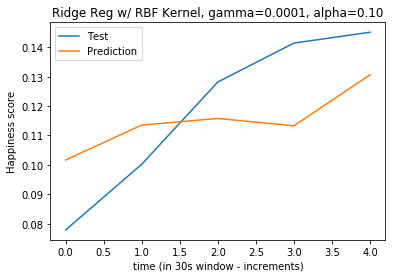

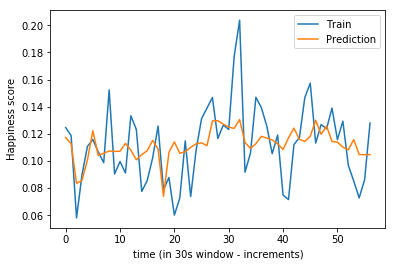

In [55]:
y_kr_pred=kr.predict(x_ev)
plt.plot(y_ev, label='Test')
plt.plot(y_kr_pred,label='Prediction')
plt.xlabel('time (in 30s window - increments)')
plt.ylabel('Happiness score')
plt.title('Ridge Reg w/ RBF Kernel, gamma=%.4f, alpha=%1.2f' %(ga,al))
plt.legend()
plt.show()
y_kr_pred_tr=kr.predict(x)
plt.plot(y, label='Train')
plt.plot(y_kr_pred_tr,label='Prediction')
plt.xlabel('time (in 30s window - increments)')
plt.ylabel('Happiness score')
plt.legend()

In [56]:
kr.best_estimator_

KernelRidge(alpha=0.1, coef0=1, degree=3, gamma=0.0001, kernel='rbf',
      kernel_params=None)

In [57]:
kr.cv_results_

/home/emil/miniconda3/envs/openmind/lib/python2.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/emil/miniconda3/envs/openmind/lib/python2.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/emil/miniconda3/envs/openmind/lib/python2.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kw

{'mean_fit_time': array([ 0.0480422 ,  0.02132106,  0.00060697,  0.00054979,  0.00065012,
         0.00060325,  0.00066528,  0.00061903,  0.00056653,  0.00051126,
         0.00050764,  0.00043788,  0.000492  ,  0.00047026,  0.00050764,
         0.00036459,  0.00042739,  0.00034389,  0.0004416 ,  0.00030775,
         0.00030155,  0.0003088 ,  0.00045462,  0.00047479,  0.00049319,
         0.00046821,  0.00041018,  0.00041137,  0.00048265,  0.00042176,
         0.00032558,  0.00031743,  0.0003252 ,  0.00052581,  0.00052776,
         0.00054083,  0.00047822,  0.00042682,  0.00038762,  0.00044122,
         0.00037441,  0.00031123,  0.00034618,  0.00052056,  0.00054464,
         0.00035381,  0.00031118,  0.00041609,  0.00052285,  0.00042734,
         0.00054283,  0.00035748,  0.00032678,  0.00041556,  0.00038137,
         0.00031323,  0.00030818,  0.0003252 ,  0.0004776 ,  0.00050058,
         0.00046825,  0.00034809,  0.00035982,  0.00040693,  0.00038223,
         0.00033178,  0.00030699, 

In [58]:
#try poly Ridge
pol = GridSearchCV(KernelRidge(kernel='poly', gamma=0.1), cv=10,
                  param_grid={"alpha": [1e5,1e6,1e3,1e2,1e0,1e-1,1e-2],
                              "degree": np.random.choice(np.arange(1, 60),5, replace=False)},scoring='neg_mean_squared_error',n_jobs=-1)


pol.fit(x,y)

/home/emil/miniconda3/envs/openmind/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/emil/miniconda3/envs/openmind/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.366022e-31
  overwrite_a=False)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=0.1, kernel='poly',
      kernel_params=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [100000.0, 1000000.0, 1000.0, 100.0, 1.0, 0.1, 0.01], 'degree': array([32, 45, 33, 18, 30])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [59]:
al, de=pol.best_params_.values()
print(al,de)

(1000000.0, 18)


('Best params', {'alpha': 1000000.0, 'degree': 18})


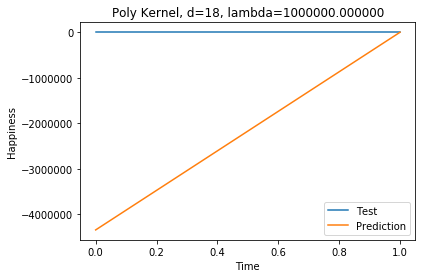

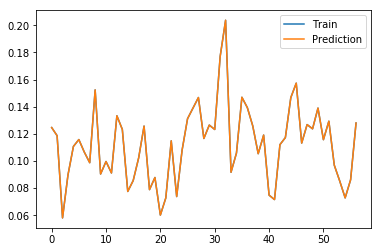

In [60]:
print('Best params',pol.best_params_)
y_pol_pred=pol.predict(x_ev)
plt.plot(y_ev[:-3], label='Test')
plt.plot(y_pol_pred[:-3],label='Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Happiness')
plt.title('Poly Kernel, d=%d, lambda=%1f' %(de,al))
plt.show()
y_pol_pred_tr=pol.predict(x)
plt.plot(y, label='Train')
plt.plot(y_pol_pred_tr,label='Prediction')
plt.legend()

In [61]:
ranf = GridSearchCV(RandomForestRegressor(), cv=5,
                  param_grid={"max_depth": np.random.choice(np.arange(10,100),20,replace=False),
                              "n_estimators": np.random.choice(np.arange(10,100),20,replace=False)},scoring='neg_mean_squared_error',n_jobs=-1)
ranf.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': array([93, 74, 11, 95, 86, 43, 28, 50, 38, 53, 41, 32, 66, 92, 34, 88, 16,
       65, 84, 60]), 'max_depth': array([36, 96, 33, 12, 11, 85, 17, 69, 88, 28, 49, 16, 30, 48, 18, 15, 34,
       54, 80, 56])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

('Best params', {'n_estimators': 28, 'max_depth': 12})


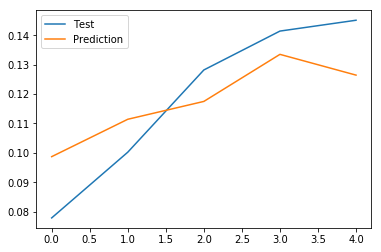

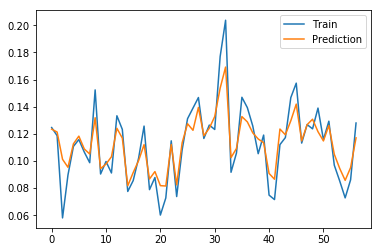

In [62]:
print('Best params',ranf.best_params_)
y_ranf_pred=ranf.predict(x_ev)
plt.plot(y_ev, label='Test')
plt.plot(y_ranf_pred,label='Prediction')
plt.legend()
plt.show()
y_ranf_pred_tr=ranf.predict(x)
plt.plot(y[:200], label='Train')
plt.plot(y_ranf_pred_tr[:200],label='Prediction')
plt.legend()

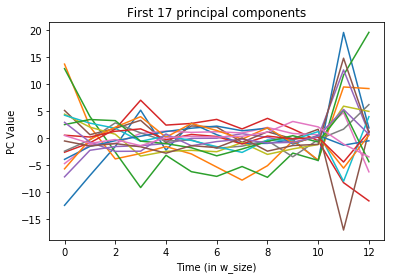

In [38]:
plt.plot(np.dot(featuregen.curr_data,featuregen.pca.components_.T))
plt.xlabel('Time (in w_size)')
plt.ylabel('PC Value')
plt.title('First %d principal components' % featuregen.pca.n_components)
plt.show()


In [ ]:
plt.plot(x_tr)


In [ ]:
reconstr=np.dot(x_tr ,featuregen.pca.components_)

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.imshow(reconstr,cmap='plasma')

In [ ]:
#fig = plt.figure(figsize=(15,15))
plt.imshow(x_tr[:250].T,vmin=np.min(x_tr),vmax=np.max(x_tr))
print(np.mean(x_tr))
plt.show()
plt.plot(y_tr)
chans=np.arange(4,20)
data=featuregen.data[chans,0:30000]
for p in range(0,len(chans)-1):
    plt.plot(data[p])
plt.xlabel('No. Samples (500Hz sample freq.)')
plt.ylabel('mV')
plt.show()

In [ ]:
featuregen.curr_data.shape

In [ ]:
rem=featuregen.curr_data[:].T
plt.imshow(rem,cmap='plasma',aspect='auto')
plt.xlabel('Time in 30s increments')
plt.gca().invert_yaxis()
plt.ylabel('Chans x Bins')


In [ ]:
np.unique(featuregen.bad_idx,return_counts=True)